<a href="https://colab.research.google.com/github/vidhya2324/Neutral_network/blob/main/MNIST_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the neccessary libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)#the purpose of seed is when we train our model with large image,each time we train our neutral network, the accuracy is slightly change. so here we use the seed,it couldn't change the accuracy
from tensorflow import keras #in dl the tensorflow, keras, pytorch are the framework which is used in dl. here keras development by google and pytorch develped by facebook
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


#data collection

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape) #28 x 28 pixel

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data--> 60,000

testing data--> 10000

dimension-->28x28

channel-->1(black and white)

In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


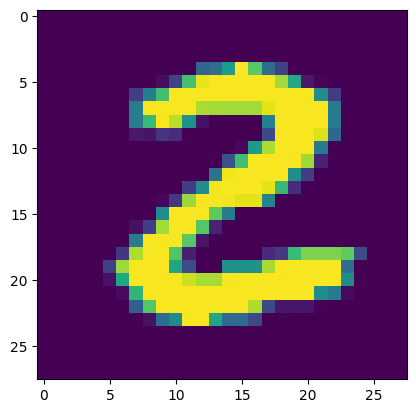

2


In [ ]:
#display the image
plt.imshow(x_train[25])
plt.show()
print(y_train[25])


Image labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values train and test image
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use the label as such or we can convert into one hot encoding

All the values must be comes under same dimension . so we resize this one

In [ ]:
#scaling the values

x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#Building the neutral network

In [21]:
#setting up the layer for neutral network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
#compile the model
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [23]:
# training the Neural Network

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8445 - loss: 0.5389
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9571 - loss: 0.1451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9678 - loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0841
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9826 - loss: 0.0576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0493
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0423
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0372
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9900 - loss: 0.0324


In [24]:
#evalate the model and find the acccuracy

loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.1453
0.97079998254776


Test data accuracy= 97%

In [25]:
print(x_test.shape)

(10000, 28, 28)


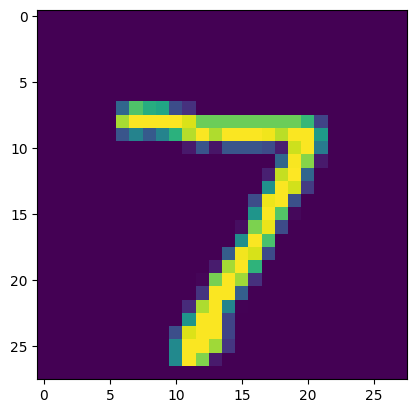

In [26]:
#display the first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [29]:
print(y_test[0])

7
